In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import calculate_mse

In [2]:
data_path = '/data/users4/xli/interpolation/results'
res_path = '/data/users4/xli/interpolation/visualization'
sz_res_path = os.path.join(data_path, 'sfnc_sz/vae/hypopt/layer3/seed3')
asd_res_path = os.path.join(data_path, 'sfnc_asd/vae/hypopt/layer2/seed6')

fnc_orig_sz_train = np.load(os.path.join(sz_res_path, 'fnc_orig.npy'))
fnc_vae_sz_train = np.load(os.path.join(sz_res_path, 'fnc_vae.npy'))
fnc_orig_sz_test = np.load(os.path.join(sz_res_path, 'fnc_orig_test.npy'))
fnc_vae_sz_test = np.load(os.path.join(sz_res_path, 'fnc_vae_mean_rm_test.npy'))

fnc_orig_asd_train = np.load(os.path.join(asd_res_path, 'fnc_orig.npy'))
fnc_vae_asd_train = np.load(os.path.join(asd_res_path, 'fnc_vae.npy'))
fnc_orig_asd_test = np.load(os.path.join(asd_res_path, 'fnc_orig_test.npy'))
fnc_vae_asd_test = np.load(os.path.join(asd_res_path, 'fnc_vae_mean_rm_test.npy'))

y_sz_train = np.load(os.path.join(sz_res_path, 'y_train_2d.npy'))
y_sz_test = np.load(os.path.join(sz_res_path, 'y_test_2d.npy'))
y_asd_train = np.load(os.path.join(asd_res_path, 'y_train_2d.npy'))
y_asd_test = np.load(os.path.join(asd_res_path, 'y_test_2d.npy'))
y_list = [[y_sz_train, y_sz_test], [y_asd_train, y_asd_test]]


In [ ]:
mse_sz_train = calculate_mse(fnc_orig_sz_train, fnc_vae_sz_train)
mse_sz_test = calculate_mse(fnc_orig_sz_test, fnc_vae_sz_test)
mse_asd_train = calculate_mse(fnc_orig_asd_train, fnc_vae_asd_train)
mse_asd_test = calculate_mse(fnc_orig_asd_test, fnc_vae_asd_test)
mse_list = [[mse_sz_train, mse_sz_test], [mse_asd_train, mse_asd_test]]

print(np.sum(mse_sz_train<0.1), np.sum(mse_sz_train<0.1)/225)
print(np.sum(mse_sz_test<0.1), np.sum(mse_sz_test<0.1)/225)
print(np.sum(mse_asd_train<0.1), np.sum(mse_asd_train<0.1)/225)
print(np.sum(mse_asd_test<0.1), np.sum(mse_asd_test<0.1)/225)

for i, ii in enumerate(['sz', 'asd']):
    for j, jj in enumerate(['train', 'test']):
        print(ii, jj, 'all', np.median(mse_list[i][j][~np.isnan(mse_list[i][j])]))
        print(ii, jj, 'patient', np.median(mse_list[i][j][y_list[i][j]==1]))
        print(ii, jj, 'control', np.median(mse_list[i][j][y_list[i][j]==2]))

225 1.0
41 0.18222222222222223
225 1.0
41 0.18222222222222223
sz train all 0.03106483646867795
sz train patient 0.03215095252764316
sz train control 0.03010835972176979
sz test all 0.03415297044330357
sz test patient 0.03367247079092635
sz test control 0.03435507840467737
asd train all 0.02874677855376027
asd train patient 0.029656636646236086
asd train control 0.028222451264898422
asd test all 0.03388745420728521
asd test patient 0.03659940886687395
asd test control 0.03056377043278922


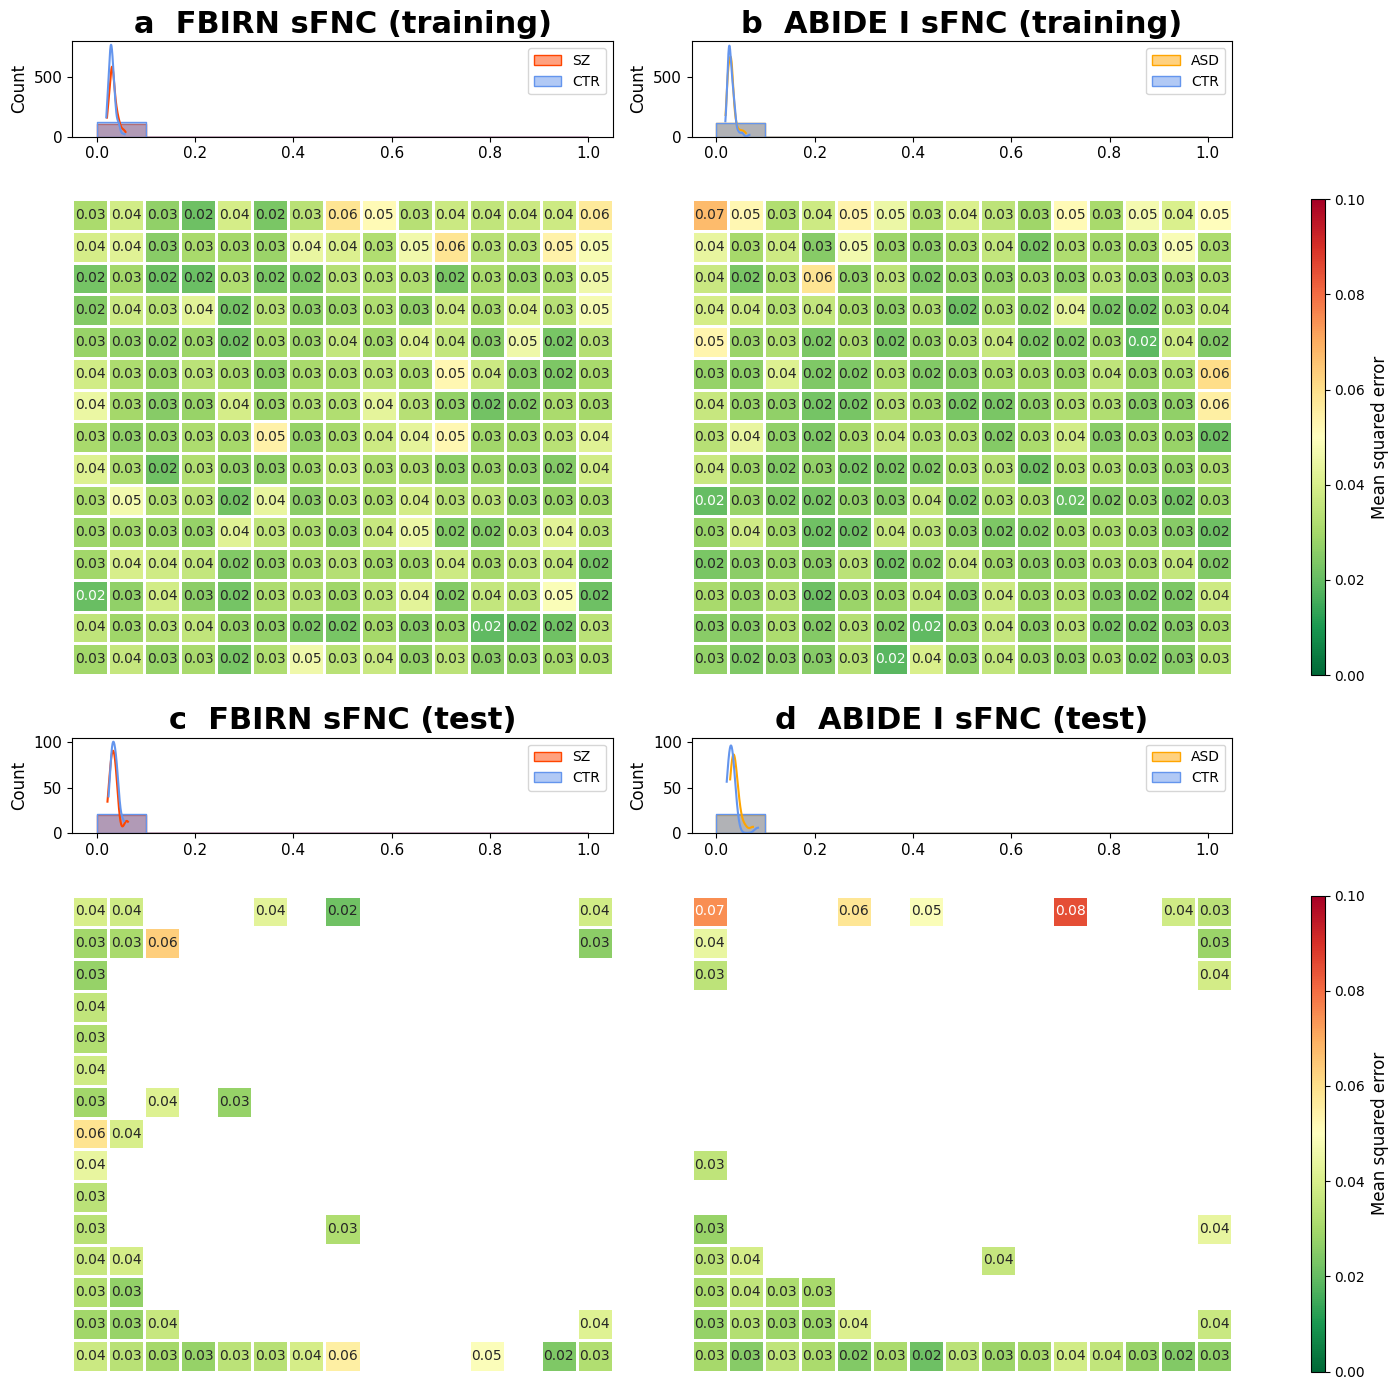

In [ ]:
title_list = [['a  FBIRN sFNC (training)', 'c  FBIRN sFNC (test)'], ['b  ABIDE I sFNC (training)', 'd  ABIDE I sFNC (test)']]
patient_list = ['SZ', 'ASD']
patient_color_list = ['orangered', 'orange']
count_lim = [800, 105]

fig, axes = plt.subplots(nrows=4, ncols=2+1, figsize=(14,14), gridspec_kw={"width_ratios":[1,1,0.025],'height_ratios': [1,5,1,5]})

for i in range(2):
    for j, k in enumerate([1,3]):
        sns.heatmap(np.abs(mse_list[i][j]), linewidths=1, annot=True, fmt='.2f', cbar=False, cmap="RdYlGn_r", vmin=0, vmax=0.1, ax=axes[k,i])
        axes[k,i].axis('off')
        sns.histplot(np.abs(mse_list[i][j][y_list[i][j]==1]).flatten(), kde=True, binwidth=0.1, binrange=[0,1], color=patient_color_list[i], element="step", label=patient_list[i], ax=axes[j*2,i])
        sns.histplot(np.abs(mse_list[i][j][y_list[i][j]==2]).flatten(), kde=True, binwidth=0.1, binrange=[0,1], color="cornflowerblue", element="step", label="CTR", ax=axes[j*2,i])
        axes[j*2,i].set_title(title_list[i][j], color="k", fontweight="bold", fontsize=22)
        axes[j*2,i].tick_params(axis='both', which='major', labelsize=11)
        axes[j*2,i].set_ylabel('Count', fontsize=12)
        axes[j*2,i].set_ylim([0,count_lim[j]])
        axes[j*2,i].legend(loc='upper right')

for i in [1, 3]:
    cbar = fig.colorbar(axes[1,0].get_children()[0], cax=axes[i,2], orientation="vertical")
    cbar.set_label('Mean squared error', fontsize=12)

for i in [0, 2]:
    axes[i,2].axis('off')

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()
plt.savefig(os.path.join(res_path, 'mse.pdf'))